In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
#import mplleaflet

https://github.com/AashitaK/Plotting-Record-Temperatures/blob/master/Plot%20Record%20Temperatures%20for%20New%20Orleans.ipynb

http://www.aashitak.com/projects/Plotting-Temperatures-NOLA
https://scentellegher.github.io/programming/2017/05/24/pandas-bar-plot-with-formatted-dates.html

In [2]:
# Load the data
data = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
# convert date to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
#Create month and day columns
data['Day'] = data.Date.dt.day
data['Month'] = data.Date.dt.month
data['Data_Value'] = data['Data_Value']*0.1

In [5]:
#Select a leap days (February 29)
data[(data['Date'].dt.day==29)&(data['Date'].dt.month==2)].head()

,ID,Date,Element,Data_Value,Day,Month
18712,USC00205563,2012-02-29,TMAX,3.9,29,2
18716,USC00200842,2012-02-29,TMIN,-5.6,29,2
18729,USC00205563,2012-02-29,TMIN,-0.6,29,2
18730,USC00200842,2012-02-29,TMAX,6.1,29,2
18812,USC00208080,2012-02-29,TMIN,-4.4,29,2


In [6]:
#Delete leap days which were shown above. 
# Do it by creating a new dataframe which does not have these values
data = data[~((data['Date'].dt.day==29)&(data['Date'].dt.month==2))]

In [7]:
#Check that we do not have deleted dates
data[(data['Date'].dt.day==29)&(data['Date'].dt.month==2)].head()

,ID,Date,Element,Data_Value,Day,Month


In [8]:
#Take the data dataset as 2005 - 2014 period
data1 = data[(data.Date.dt.year>2004)&(data.Date.dt.year<2015)]
#Take the data for 2015
data2 = data[data.Date.dt.year==2015]

In [9]:
data1.set_index(['Month', 'Day'], inplace=True)
data2.set_index(['Month', 'Day'], inplace=True)

In [10]:
data1.sort_index(inplace = True)
data2.sort_index(inplace = True)

C:\Roman Kutskyi\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Roman Kutskyi\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
#date_range = data2['Date'].unique() 

In [12]:
# There are lot of station, each of them gives the temperature TMAX and TMIN for each day
# Find the max and min temperature from (TMAX and TMIN) for the each day 
#Create a dataframe with TMAX and TMIN values values

data_max1 = data1[data1.Element=='TMAX'].groupby(level = ['Month', 'Day'])['Data_Value'].max()
data_max2 = data2[data2.Element=='TMAX'].groupby(level = ['Month', 'Day'])['Data_Value'].max()
#data_max = data_max.to_frame()
#data_max.columns = ['t']
#data_max.reset_index(inplace=True)

data_min1 = data1[data1.Element=='TMIN'].groupby(level = ['Month', 'Day'])['Data_Value'].min()
data_min2 = data2[data2.Element=='TMIN'].groupby(level = ['Month', 'Day'])['Data_Value'].min()
#data_min = data_min.to_frame()
#data_min.columns = ['t']
#data_min.reset_index(inplace=True)

In [13]:
date_range = data2['Date'].unique()

<IPython.core.display.Javascript object>


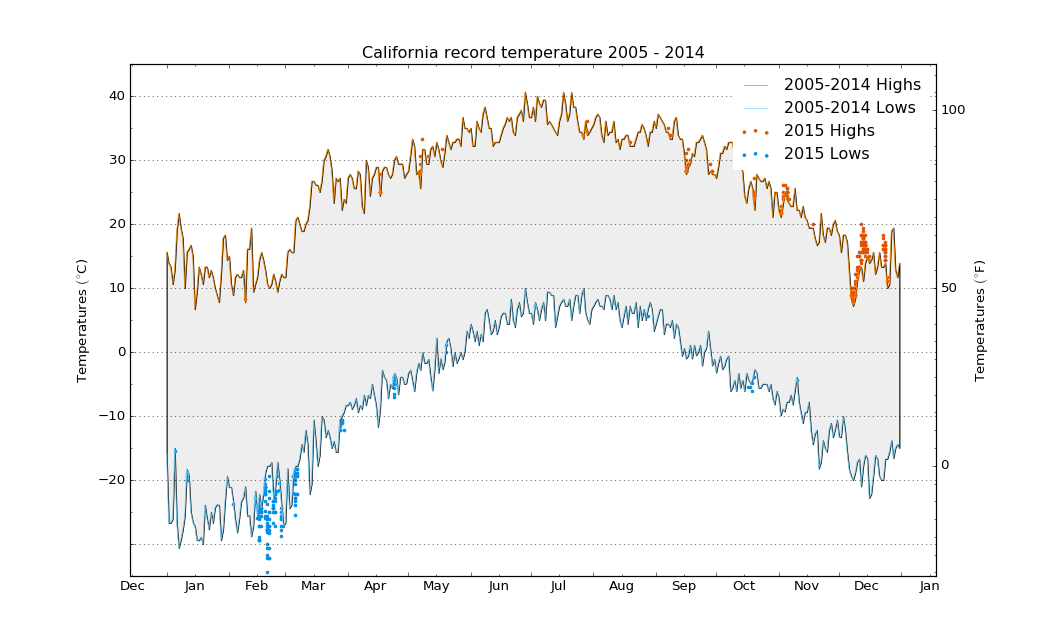

In [14]:
import matplotlib.dates as dates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,8))

ax.set_title('California record temperature 2005 - 2014')
ax.yaxis.grid() # Setting up the horizontal grid lines in the background

# Locating 12 positions for the 15th of each month on x-axis 
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) # 15 - is a day in month, where the ticker is set

# Labeling the 12 months on x-axis at the positions located above
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# Centering month labels in between the ticks and removing undesirable ticks
xticks = ax.xaxis.get_minor_ticks()
for xtick in xticks:
    xtick.tick1line.set_markersize(0)
    xtick.tick2line.set_markersize(0)
    xtick.label1.set_horizontalalignment('center')
    
plt.plot(date_range, data_max1.values, '#FF9100', linewidth = 1, alpha=0.75, label = '2005-2014 Highs')
plt.plot(date_range, data_min1.values, '#80D8FF', linewidth = 1, alpha=0.75, label = '2005-2014 Lows')
plt.fill_between(date_range, data_min1, data_max1, facecolor='#EEEEEE')
plt.legend(loc = 1).get_frame().set_edgecolor('white')
#plt.xticks(rotation='vertical')

In [15]:
plt.legend(loc = 1).get_frame().set_edgecolor('white') 

# Labels for the legends of the scatter plots below
my_label_max = "2015 Highs"
my_label_min = "2015 Lows"

In [16]:
for idx, rows in data2[data2.Element=='TMAX'].iterrows():
    if rows['Data_Value']>data_max1.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], color='#E65100', marker = '.', label =my_label_max)
        my_label_max = "_nolegend_" # To avoid duplicate labels in the legend
        
for idx, rows in data2[data2.Element=='TMIN'].iterrows():
    if rows['Data_Value']<data_min1.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], color='#0091EA', marker = '.', label =my_label_min)
        my_label_min = "_nolegend_" # To avoid duplicate labels in the legend
        
ax.legend(loc = 1).get_frame().set_edgecolor('white')

In [17]:
ax.set_ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis

# Setting the temperature limits for y-axis from -10 to 50 degrees Celsius
ymin, ymax = -35, 45
ax.set_ylim(ymin, ymax) 
yticks = ax.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False) # Making 50 degrees Celsius disappear to make the graph look cleaner
yticks[1].label1.set_visible(False) # Making -10 degrees Celsius disappear to make the graph look cleaner
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # Putting major ticks at every 100 degrees Celsius
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) # Putting minor ticks at every 50 degrees Celsius

In [18]:
# Set up a second axis. To scale it just put the new limit values

ax2 = ax.twinx() # Create a twin y-axis sharing the x-axis with the previous y-axis
ax2.set_ylabel('Temperatures $(^{\circ}$F)') # Setting label for y-axis
def C_to_F(temp_f): # Celsius to Fahrenheit  
    return 9/5 *temp_f + 32
ax2.set_ylim(C_to_F(ymin), C_to_F(ymax)) # (ymin, ymax) are defined above
ax2.yaxis.set_major_locator(ticker.MultipleLocator(50)) # Putting major ticks at every 20 degrees Fahrenheit
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5)) # Putting major ticks at every 5 degrees Fahrenheit